In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import stats
import matplotlib.gridspec as gridspec

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

newparams = {'axes.labelsize': 24, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 2, 'figure.figsize': (8, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 22, 'xtick.labelsize': 22,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 24, 'legend.frameon': True, 
             'legend.handlelength': 2}
plt.rcParams.update(newparams)

In [2]:
dir17="../PartD_Prescriber_PUF_NPI_17/"
dir16="../PartD_Prescriber_PUF_NPI_16/"

In [3]:
data=pd.read_table(dir17+'PartD_Prescriber_PUF_NPI_17.txt')

In [4]:
#Q1
beneficiary_age_less_65_count=data["beneficiary_age_less_65_count"]
beneficiary_age_65_74_count=data["beneficiary_age_65_74_count"]
beneficiary_age_75_84_count=data["beneficiary_age_75_84_count"]
beneficiary_age_greater_84_count=data["beneficiary_age_greater_84_count"]
bene_count=data["bene_count"]

total_number_of_beneficiary=beneficiary_age_greater_84_count+beneficiary_age_75_84_count+beneficiary_age_65_74_count+beneficiary_age_less_65_count
print("Q1 average number of beneficiary is ", np.mean(total_number_of_beneficiary),np.mean(bene_count))

Q1 average number of beneficiary is  330.57885562023495 158.3494585173676


In [5]:
#Q2
specialty_description=data["specialty_description"]
s_set = set(specialty_description)
brand_suppress_flag=data["brand_suppress_flag"] #NaN is good
total_claim_count=data["total_claim_count"]
brand_claim_count=data["brand_claim_count"]

In [226]:
print(s_set)

{'Prevention Professional', 'General Surgery', 'General Practice', 'Podiatry', 'Radiation Oncology', 'General Acute Care Hospital', 'Gynecological Oncology', 'Technician/Technologist', 'Personal Emergency Response Attendant', 'Residential Treatment Facility, Emotionally Disturbed Children', 'Gastroenterology', 'Otolaryngology', 'Hematopoietic Cell Transplantation and Cellular Therapy', 'Marriage & Family Therapist', 'Psychiatry & Neurology', 'Ophthalmology', 'Genetic Counselor, MS', 'Neuromusculoskeletal Medicine, Sports Medicine', 'Hospital', 'Other Medical Supply Company', 'Rehabilitation Practitioner', 'Nuclear Medicine', 'Undefined Physician type', 'Denturist', 'Community Health Worker', 'Pathology', 'Urology', 'Hematology-Oncology', 'Technician', 'Occupational Therapy Assistant', 'Allergy/ Immunology', 'Specialist/Technologist', 'Acupuncturist', 'Advanced Practice Dental Therapist', 'Preventive Medicine', 'Skilled Nursing Facility', 'Chronic Disease Hospital', 'Orthopedic Surgery'

In [6]:
n_claims=np.zeros(len(s_set))
brand_fraction=np.zeros(len(s_set))
i=0
for name in s_set:
    good=(specialty_description==name)&(brand_suppress_flag!="NaN")
    n_claims[i]=np.sum(total_claim_count[good])
    brand_fraction[i]=np.sum(brand_claim_count[good])/n_claims[i]
    i+=1

i=0
for name in s_set:
    if n_claims[i]>1000:
        print(name," fraction= ",brand_fraction[i])
    i+=1

In [7]:
good=n_claims>1000
print(np.std(brand_fraction[good]))

0.09132297225354662


In [8]:
#Q3
opioid_claim_count=data["opioid_claim_count"]
opioid_day_supply=data["opioid_day_supply"]
nppes_provider_state=data["nppes_provider_state"]

not_state=["XX","AA","AE","AP","AS","GU","MP","PR","VI","ZZ"]
bad=np.isin(nppes_provider_state,not_state)
state_set = set(nppes_provider_state[~bad])

In [9]:
length_opioid=opioid_day_supply/opioid_claim_count
q3=np.zeros(shape=(len(s_set),len(state_set)))

In [10]:
i=0
aa=np.zeros(shape=(len(s_set),len(state_set)))
bb=np.zeros(len(s_set))
for sp in s_set:
    j=0
    good2=(specialty_description==sp)&(length_opioid>0)
    bb[i]=np.mean(length_opioid[good2])
    for state in state_set:
        good=good2&(nppes_provider_state==state)
        if (len(length_opioid[good])>100):
            aa[i,j]=np.mean(length_opioid[good])
        j+=1
    i+=1

In [11]:
print(np.max(aa),np.max(bb[bb>0]))

31.898681991464333 30.30131772988916


/Users/yli/source/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [12]:
#Q4
total_day_supply=data["total_day_supply"]
total_claim_count=data["total_claim_count"]
length_of_prescription=total_day_supply/total_claim_count
print(np.median(length_of_prescription))

29.7125748502994


In [13]:
#Q5
antibiotic_claim_count=data["antibiotic_claim_count"]
q5=np.zeros(len(state_set))
op=total_number_of_beneficiary[opioid_claim_count>10]
anti=total_number_of_beneficiary[antibiotic_claim_count>10]
i=0
for state in state_set:
    good=(nppes_provider_state==state)
    q5[i]=(np.sum(op[good])/np.sum(anti[good]))
    i+=1
print(np.max(q5[q5>0])-np.min(q5[q5>0]))

0.19195901275274896


In [14]:
#Q6
older=beneficiary_age_65_74_count+beneficiary_age_75_84_count+beneficiary_age_greater_84_count
older_fraction=older/total_number_of_beneficiary

In [15]:
lis_claim_count=data["lis_claim_count"]
nonlis_claim_count=data["nonlis_claim_count"]
check_total=nonlis_claim_count+lis_claim_count
lis_fraction=lis_claim_count/check_total

In [16]:
good=(older_fraction>0)&(lis_fraction>0)
r, p = stats.pearsonr(older_fraction[good], lis_fraction[good])
print("Pearson correlation coefficient r and p", r,p)

Pearson correlation coefficient r and p -0.5615508018971427 0.0


In [17]:
#Q7
npi=data["npi"]
total_drug_cost=data["total_drug_cost"]
daily_cost=total_drug_cost/total_day_supply

In [18]:
data16=pd.read_table(dir16+'PartD_Prescriber_PUF_NPI_16.txt')
npi16=data16["npi"]
total_drug_cost16=data16["total_drug_cost"]
total_day_supply16=data16["total_day_supply"]
daily_cost16=total_drug_cost16/total_day_supply16


In [19]:
mask17 = np.isin(npi, npi16)
mask16=np.isin(npi16, npi)
inflation=daily_cost[mask17]/daily_cost16[mask16]-1


In [20]:

print(np.mean(inflation[inflation>-1]))

1.9481466141488235


In [21]:
#Q8
specialty_description16=data16["specialty_description"]
f_left=np.zeros(len(s_set))
i=0
for sp in s_set:
    good17=(specialty_description==sp)
    good16=(specialty_description16==sp)
    stay_npi=np.isin(npi16[good16],npi[good17])
    if len(npi16[good16])>1000:
        f_left[i]=1-len(npi16[good16][stay_npi])/len(npi16[good16])
    i+=1

In [22]:
print("Q8",np.max(f_left))


Q8 0.3768656716417911


In [23]:
#below is the new project

In [26]:
antipsych_bene_count_ge65=data["antipsych_bene_count_ge65"]
beneficiary_female_count=data["beneficiary_female_count"]
beneficiary_male_count=data["beneficiary_male_count"]
opioid_prescriber_rate=data["opioid_prescriber_rate"]
average_age_of_beneficiaries=data["average_age_of_beneficiaries"]
antibiotic_bene_count=data["antibiotic_bene_count"]
opioid_bene_count=data["opioid_bene_count"]
nppes_entity_code=data["nppes_entity_code"] #checked, and only three are "O"
nppes_credentials=data["nppes_credentials"]
nppes_provider_gender=data["nppes_provider_gender"]

In [29]:
e_data=pd.read_table("../President2016.txt",header=None)
e_data_array=e_data.to_numpy()
e_data_array.shape

(51, 25)

In [30]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
locale.atoi(e_data_array[3,2])

380494

In [33]:
trump_votes = np.array([locale.atoi(x) for x in e_data_array[:,5]])
H_votes = np.array([locale.atoi(x) for x in e_data_array[:,2]])
red=H_votes<trump_votes #If trump wins, define the sate as a red state
redness=trump_votes/(trump_votes+H_votes) #trump vs Hillary 

In [34]:
dr_opioid=opioid_claim_count/bene_count
dr_antibiotic=antibiotic_claim_count/bene_count
dr_opioid_bene=opioid_bene_count/bene_count #fraction of patients getting opioid
dr_antibiotic_bene=antibiotic_bene_count/bene_count
dr_antipsych_bene=antipsych_bene_count_ge65/bene_count
bene_f_female=beneficiary_female_count/(beneficiary_female_count+beneficiary_male_count)

In [35]:
dr_red=np.isin(nppes_provider_state,e_data_array[red,23])
dr_blue=np.isin(nppes_provider_state,e_data_array[~red,23])

0.07246225800796646 0.0


0.23723383955330823 0.0


0.23723383955330823 0.0


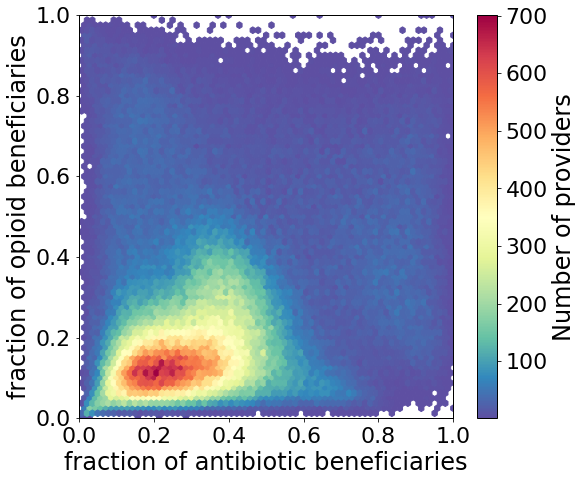

In [229]:

good=(dr_antibiotic_bene>0)&(dr_opioid_bene>0)&(bene_count>0)#(bene_count>10)&(bene_count<100)
rr, pp = stats.spearmanr(dr_opioid_bene[good], dr_antibiotic_bene[good])
print(rr,pp)
plt.clf()
fig = plt.figure(figsize=(10, 8))
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,1,0,1]
image=plt.hexbin(dr_antibiotic_bene[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=plt.hexbin(dr_antipsych_bene[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)\

#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel("fraction of antibiotic beneficiaries")
plt.ylabel("fraction of opioid beneficiaries")
plt.xlim(0,1)
plt.ylim(0,1)
cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
plt.savefig("provider_correlation_bene.png")  #
plt.show()

0.17018785264366387 4.935462693508347e-161


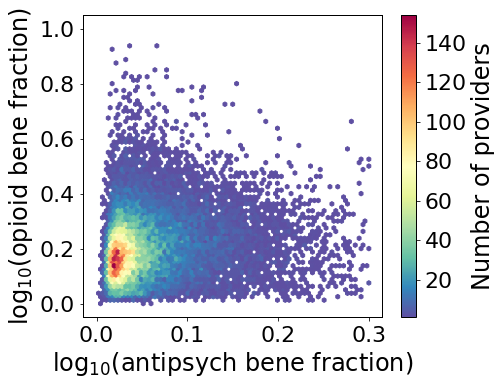

In [39]:
good=(dr_antipsych_bene>0)&(dr_opioid_bene>0)&(bene_count>0)#(bene_count>10)&(bene_count<100)
rr, pp = stats.spearmanr(dr_opioid_bene[good], dr_antipsych_bene[good])
print(rr,pp)
plt.clf()
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,0.3,0,1]
#image=plt.hexbin(dr_antibiotic_bene[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
image=plt.hexbin(dr_antipsych_bene[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)\

#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(antipsych bene fraction)")
plt.ylabel(r'$\rm log_{10}$'+"(opioid bene fraction)")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
#plt.savefig("provider_correlation_bene.png")  #
plt.show()

0.07246225800796646 0.0


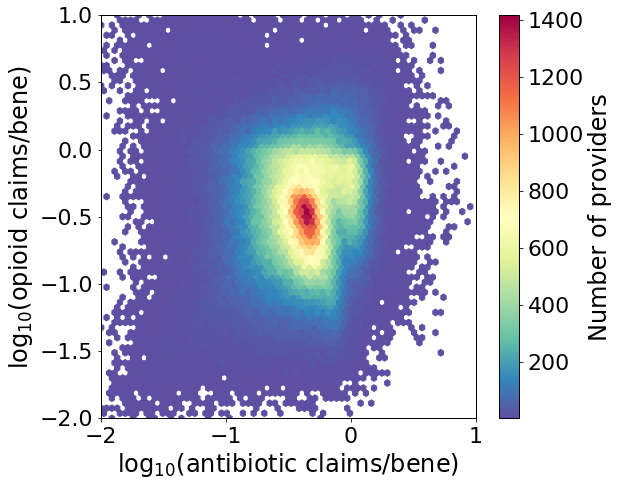

In [237]:
plt.clf()
good=(dr_antibiotic>0)&(dr_opioid>0)
rr, pp = stats.spearmanr(dr_opioid[good], dr_antibiotic[good])
print(rr,pp)
fig = plt.figure(figsize=(10, 8))
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[-2,1,-2,1]
image=plt.hexbin(np.log10(dr_antibiotic[good]),np.log10(dr_opioid[good]),extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(antibiotic claims/bene)")
plt.ylabel(r'$\rm log_{10}$'+"(opioid claims/bene)")
plt.xlim(-2,1)
plt.ylim(-2,1)
cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
plt.savefig("provider_correlation.png")
plt.show()


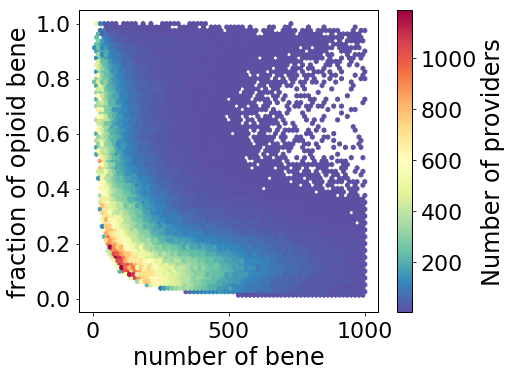

-0.5794305021170759 0.0


In [225]:
plt.clf()
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,1000,0,1]
good=(bene_count>10)&(dr_opioid_bene>0)
image=plt.hexbin(bene_count[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel("number of bene")
plt.ylabel("fraction of opioid bene")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
#plt.savefig("provider_correlation.png")
plt.show()

rr, pp = stats.spearmanr(bene_count[good],dr_opioid_bene[good])
print(rr,pp)

In [210]:
bene_count

0          234.0
1          276.0
2           33.0
3            NaN
4           11.0
           ...  
1162893    144.0
1162894      NaN
1162895      NaN
1162896     38.0
1162897     77.0
Name: bene_count, Length: 1162898, dtype: float64

In [41]:

good_filter=(nppes_entity_code!="O")
female=(nppes_provider_gender=="F")&good_filter
male=(nppes_provider_gender=="M")&good_filter

In [42]:
i=0
state_opioid_claim_count=np.zeros(len(state_set))
state_opioid_bene_count=np.zeros(len(state_set))
state_antibiotic_claim_count=np.zeros(len(state_set))
state_antibiotic_bene_count=np.zeros(len(state_set))

state_n_beneficiary=np.zeros(len(state_set))
state_color=np.ones(len(state_set)) 
state_list=[]
for state in state_set:
    good=(nppes_provider_state==state)
    state_opioid_claim_count[i]=np.sum(opioid_claim_count[good])
    state_opioid_bene_count[i]=np.sum(opioid_bene_count[good])
    state_antibiotic_bene_count[i]=np.sum(antibiotic_bene_count[good])
    state_antibiotic_claim_count[i]=np.sum(antibiotic_claim_count[good])
    state_n_beneficiary[i]=np.sum(total_number_of_beneficiary[good])
    state_color[i]=np.isin(state,e_data_array[red,23])
    state_list.append(state)
    i+=1

In [43]:
OO=(nppes_entity_code=="O")
print(nppes_entity_code[OO].shape)

(3,)


In [44]:
state_array=np.array(state_list)


In [45]:
opioid_per_beneficiary=state_opioid_claim_count/state_n_beneficiary
opioid_per_beneficiary.shape
antibiotic_per_beneficiary=state_antibiotic_claim_count/state_n_beneficiary

state_antibiotic=state_antibiotic_bene_count/state_n_beneficiary 
state_opioid=state_opioid_bene_count/state_n_beneficiary 

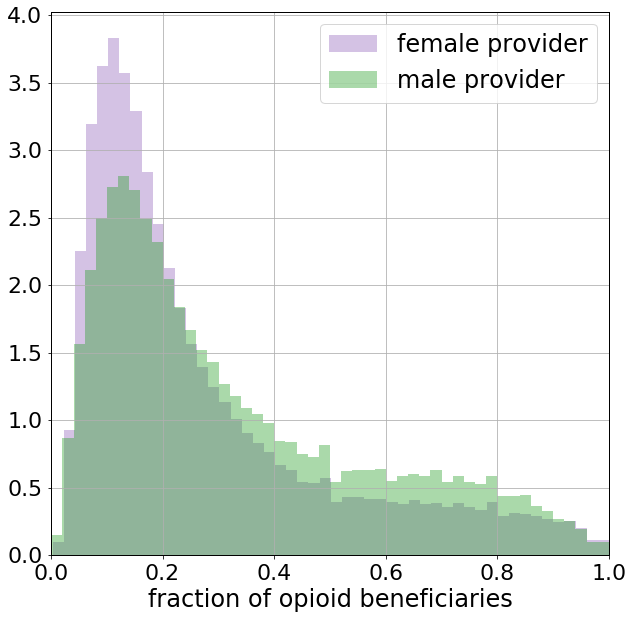

In [262]:
fig = plt.figure(figsize=(10, 10))
good=female&(dr_opioid_bene>0)
good_m=male&(dr_opioid_bene>0)
plt.hist(dr_opioid_bene[good],bins=50,color="C4",alpha=0.4,normed=True)
plt.hist(dr_opioid_bene[good_m],bins=50,color="C2",alpha=0.4,normed=True)
plt.legend(("female provider","male provider"),loc="best")
plt.xlabel("fraction of opioid beneficiaries")
plt.xlim(0,1)
plt.grid()
plt.savefig("male_female_dr_opioid.png")
plt.show()

In [208]:
print(len(opioid_prescriber_rate[dr_red&female]))
print(len(opioid_prescriber_rate[dr_red&male]))
print(len(opioid_prescriber_rate[dr_blue&female]))
print(len(opioid_prescriber_rate[dr_blue&male]))
print("female to male provider ratio: ",len(bene_count[female])/len(bene_count[male]))
print("female to male provider ratio in red states: ",len(opioid_prescriber_rate[dr_red&female])/len(opioid_prescriber_rate[dr_red&male]))
print("female to male provider ratio in blue states: ",len(opioid_prescriber_rate[dr_blue&female])/len(opioid_prescriber_rate[dr_blue&male]))

264702
360145
234935
292060
female to male provider ratio:  0.7636616497109335
female to male provider ratio in red states:  0.73498729678324
female to male provider ratio in blue states:  0.8044066287749093


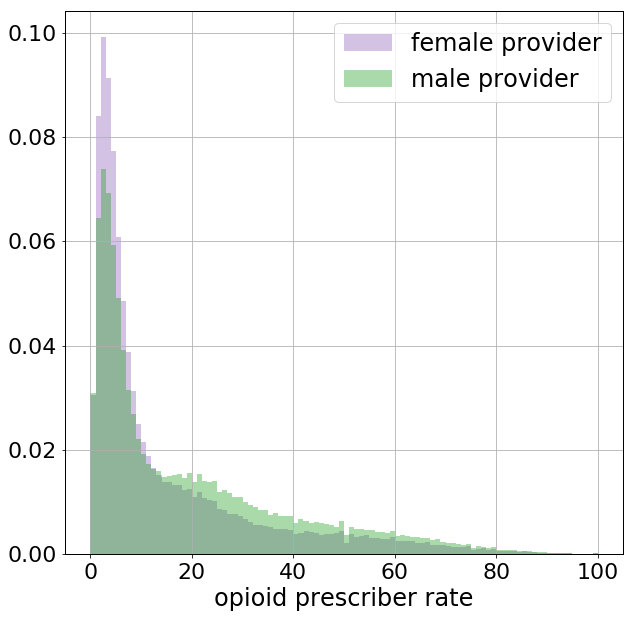

In [195]:
good=female&(dr_opioid_bene>0)
good_m=male&(dr_opioid_bene>0)
fig = plt.figure(figsize=(10, 10))
plt.hist(opioid_prescriber_rate[good],bins=100,color="C4",alpha=0.4,normed=True)
plt.hist(opioid_prescriber_rate[good_m],bins=100,color="C2",alpha=0.4,normed=True)
plt.legend(("female provider","male provider"),loc="best")
plt.xlabel("opioid prescriber rate")
plt.grid()
plt.show()

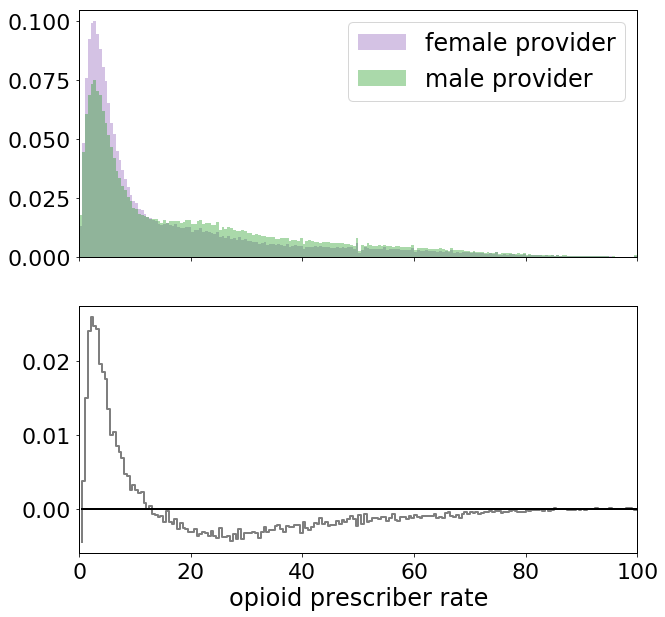

In [192]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
(n1,bins1,p1)=ax1.hist(opioid_prescriber_rate[good],bins=200,color="C4",alpha=0.4,normed=True)
(n2,bins2,p2)=ax1.hist(opioid_prescriber_rate[good_m],bins=200,color="C2",alpha=0.4,normed=True)
ax1.legend(("female provider","male provider"),loc="best")
#ax1.hist(dr_antibiotic_bene[good_m&dr_blue],bins=45,color="C9",histtype="step",normed=True)
ax2.plot(bins1[1:],n1-n2,drawstyle='steps',color="C7")
ax2.plot(bins1[1:],np.zeros_like(bins1[1:]),color="k")
ax2.set_xlabel("opioid prescriber rate")
#ax1.set_ylabel("fraction of bene")
#ax2.set_ylabel("difference")
ax1.set_xlim(0,100)
#ax2.hist(average_age_of_beneficiaries[good&female],bins=45,range=(45,90),color="C3",alpha=0.5,normed=True)
plt.show()

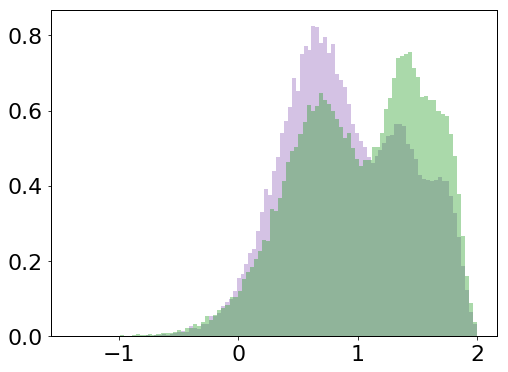

In [134]:

plt.hist(np.log10(opioid_prescriber_rate[good]),bins=100,color="C4",alpha=0.4,normed=True)
plt.hist(np.log10(opioid_prescriber_rate[good_m]),bins=100,color="C2",alpha=0.4,normed=True)
plt.show()

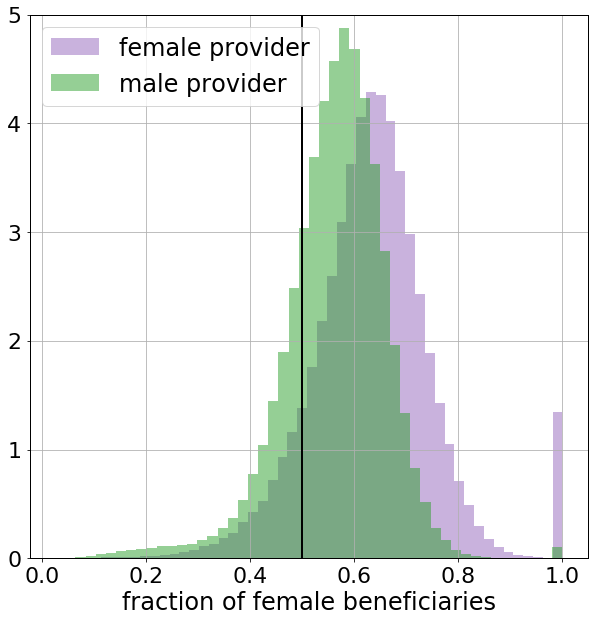

0.633153658851569 0.5618495050479887
0.6341463414634146 0.5707547169811321
0.6003915817196284


In [263]:
good=(bene_f_female>0)&(bene_count>0)&(specialty_description!='Obstetrics & Gynecology')
plt.clf()
fig = plt.figure(5, figsize=(10, 10))
plt.hist(bene_f_female[good&female],bins=50,color="C4",alpha=0.5,normed=True)
plt.hist(bene_f_female[male&good],bins=50,color="C2",alpha=0.5,normed=True)
#plt.hist(bene_f_female[male&good&dr_blue],bins=50,color="k",histtype="step",normed=True)
plt.xlabel("fraction of female beneficiaries")
plt.legend(("female provider","male provider"),loc="upper left")
plt.grid()
plt.vlines(0.5,0,10)
plt.ylim(0,5)
plt.savefig("male_female_dr_female_bene.png")
plt.show()
print(np.mean(bene_f_female[good&female]),np.mean(bene_f_female[male&good]))
print(np.median(bene_f_female[good&female]),np.median(bene_f_female[male&good]))
print(np.mean(bene_f_female))

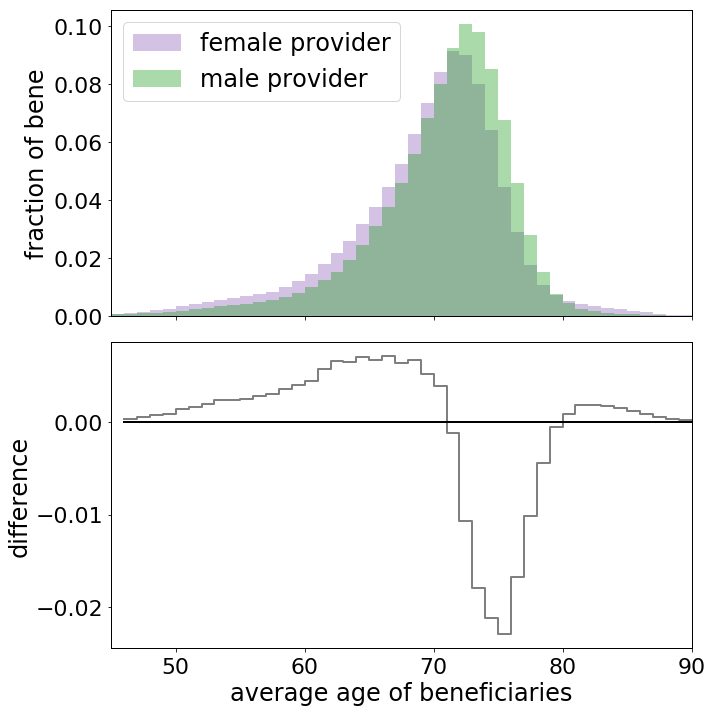

In [260]:
good=(average_age_of_beneficiaries>0)&(bene_count>0)
plt.clf()
#fig = plt.figure(5, figsize=(8, 8))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
(n1,bins1,p1)=ax1.hist(average_age_of_beneficiaries[good&female],bins=45,range=(45,90),color="C4",alpha=0.4,normed=True)
(n2,bins2,p2)=ax1.hist(average_age_of_beneficiaries[male&good],bins=45,range=(45,90),color="C2",alpha=0.4,normed=True)
#ax1.hist(average_age_of_beneficiaries[female&good&dr_red],bins=45,range=(45,90),color="C4",histtype="step",normed=True)
###ax1.hist(average_age_of_beneficiaries[female&good&dr_blue],bins=45,range=(45,90),color="k",histtype="step",normed=True)
#ax1.hist(average_age_of_beneficiaries[male&good&dr_blue],bins=45,range=(45,90),color="C2",histtype="step",normed=True)

ax1.set_xlim(45,90)
ax2.plot(bins1[1:],n1-n2,drawstyle='steps',color="C7")
ax2.plot(bins1[1:],np.zeros_like(bins1[1:]),color="k")
ax2.set_xlabel("average age of beneficiaries")
ax1.set_ylabel("fraction of bene")
ax2.set_ylabel("difference")
ax1.legend(("female provider","male provider"),loc="best")
plt.tight_layout()
plt.savefig("age_bene_FM.png")
#ax2.hist(average_age_of_beneficiaries[good&female],bins=45,range=(45,90),color="C3",alpha=0.5,normed=True)
plt.show()

In [105]:
n1

array([0.00082418, 0.00098181, 0.00142543, 0.00192985, 0.00237347,
       0.00328773, 0.0040376 , 0.00481674, 0.00564543, 0.00603951,
       0.00674884, 0.00750998, 0.00835443, 0.01002756, 0.01204524,
       0.0144705 , 0.01800142, 0.0218904 , 0.02593475, 0.03164548,
       0.03777732, 0.04460047, 0.05245273, 0.06269422, 0.07353696,
       0.08410272, 0.09133121, 0.08996208, 0.08004035, 0.06423225,
       0.04454643, 0.02905133, 0.01759158, 0.01071663, 0.00718571,
       0.00516803, 0.00419298, 0.00340933, 0.00279231, 0.0022271 ,
       0.00173844, 0.00122727, 0.00079716, 0.00037381, 0.00026122])

(1162898,)
(1162898,)


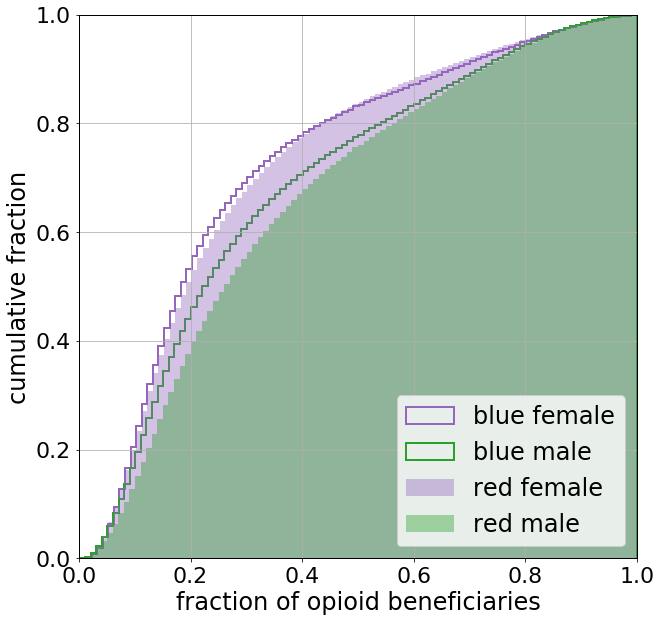

In [240]:
print(dr_opioid_bene.shape)
print(female.shape)
plt.clf()
plt.figure(figsize=(10, 10))
good=female&(dr_opioid_bene>0)
good_m=male&(dr_opioid_bene>0)
plt.hist(dr_opioid_bene[good&dr_blue],bins=100,color="C4",histtype="step",cumulative=True,normed=True,linewidth=2)
plt.hist(dr_opioid_bene[good_m&dr_blue],bins=100,color="C2",histtype="step",cumulative=True,normed=True,linewidth=2)
plt.hist(dr_opioid_bene[good&dr_red],bins=100,color="C4",alpha=0.4,cumulative=True,normed=True)
plt.hist(dr_opioid_bene[good_m&dr_red],bins=100,color="C2",alpha=0.4,cumulative=True,normed=True)
plt.legend(("blue female","blue male","red female","red male"),loc="lower right")
plt.xlabel("fraction of opioid beneficiaries")
plt.ylabel("cumulative fraction")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.savefig("opioid_bene_FM.png")
plt.show()

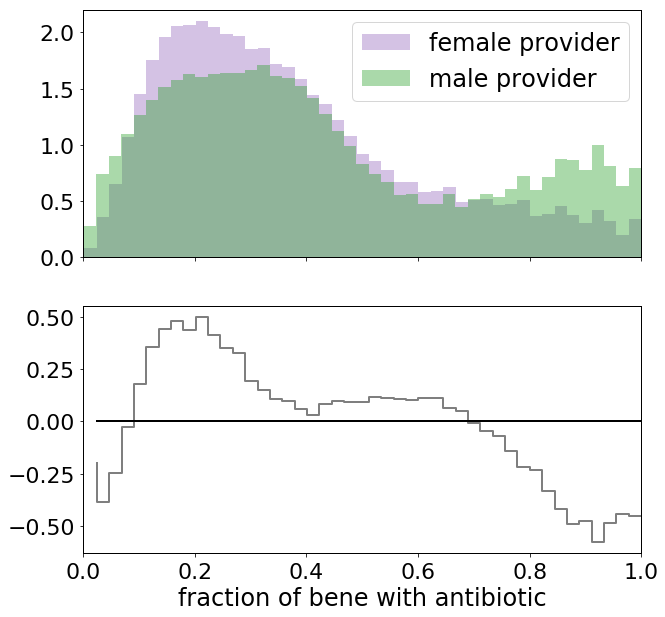

In [301]:

plt.clf()
good=female&(dr_antibiotic_bene>0)
good_m=male&(dr_antibiotic_bene>0)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
(n1,bins1,p1)=ax1.hist(dr_antibiotic_bene[good],bins=45,color="C4",alpha=0.4,normed=True)
(n2,bins2,p2)=ax1.hist(dr_antibiotic_bene[good_m],bins=45,color="C2",alpha=0.4,normed=True)
ax1.legend(("female provider","male provider"),loc="best")
#ax1.hist(dr_antibiotic_bene[good_m&dr_blue],bins=45,color="C9",histtype="step",normed=True)
ax2.plot(bins1[1:],n1-n2,drawstyle='steps',color="C7")
ax2.plot(bins1[1:],np.zeros_like(bins1[1:]),color="k")
ax2.set_xlabel("fraction of bene with antibiotic")
#ax1.set_ylabel("fraction of bene")
#ax2.set_ylabel("difference")
ax1.set_xlim(0,1)
#ax2.hist(average_age_of_beneficiaries[good&female],bins=45,range=(45,90),color="C3",alpha=0.5,normed=True)
plt.savefig("female_male_antibiotic.png")
plt.show()

In [51]:
nppes_provider_state16=data16["nppes_provider_state"]
opioid_claim_count16=data16["opioid_claim_count"]
antibiotic_claim_count16=data16["antibiotic_claim_count"]

In [160]:
beneficiary_age_less_65_count16=data16["beneficiary_age_less_65_count"]
beneficiary_age_65_74_count16=data16["beneficiary_age_65_74_count"]
beneficiary_age_75_84_count16=data16["beneficiary_age_75_84_count"]
beneficiary_age_greater_84_count16=data16["beneficiary_age_greater_84_count"]
bene_count16=data16["bene_count"]
opioid_bene_count16=data16["opioid_bene_count"]
antibiotic_bene_count16=data16["antibiotic_bene_count"]
total_number_of_beneficiary16=beneficiary_age_greater_84_count16\
+beneficiary_age_75_84_count16+beneficiary_age_65_74_count16+beneficiary_age_less_65_count16

In [162]:
i=0
state_opioid_claim_count16=np.zeros(len(state_set))
state_antibiotic_claim_count16=np.zeros(len(state_set))
state_n_beneficiary16=np.zeros(len(state_set))
state_antibiotic_bene_count16=np.zeros(len(state_set))
state_opioid_bene_count16=np.zeros(len(state_set))
for state in state_set:
    good=(nppes_provider_state16==state)
    state_opioid_claim_count16[i]=np.sum(opioid_claim_count16[good])
    state_n_beneficiary16[i]=np.sum(total_number_of_beneficiary16[good])
    state_antibiotic_claim_count16[i]=np.sum(antibiotic_claim_count16[good])
    state_antibiotic_bene_count16[i]=np.sum(antibiotic_bene_count16[good])
    state_opioid_bene_count16[i]=np.sum(opioid_bene_count16[good])
    i+=1

In [163]:
opioid_per_beneficiary16=state_opioid_claim_count16/state_n_beneficiary16
antibiotic_per_beneficiary16=state_antibiotic_claim_count16/state_n_beneficiary16
state_opioid16=state_opioid_bene_count16/state_n_beneficiary16 
state_antibiotic16=state_antibiotic_bene_count16/state_n_beneficiary16 

In [55]:
rr, pp = stats.pearsonr(antibiotic_per_beneficiary, opioid_per_beneficiary)
print(rr,pp)

rr, pp = stats.pearsonr(state_antibiotic, state_opioid)
print(rr,pp)

0.7057030939216001 7.3228019395801954e-09
0.7335083437606439 9.22820481474662e-10


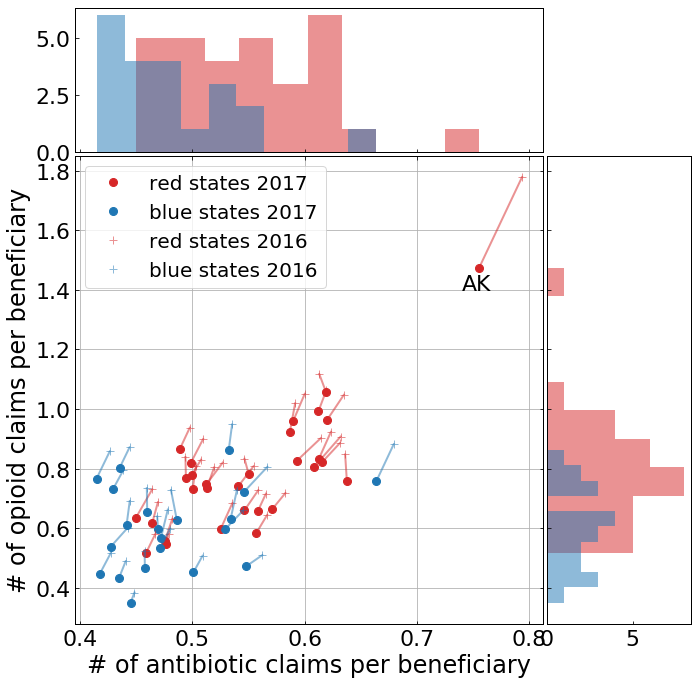

In [56]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
plt.clf()

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize=(10, 10))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

ax_scatter.plot(antibiotic_per_beneficiary[state_color==1],opioid_per_beneficiary[state_color==1],color="C3",linestyle="None",marker="o",markersize=8)
ax_scatter.plot(antibiotic_per_beneficiary[state_color==0],opioid_per_beneficiary[state_color==0],color="C0",linestyle="None",marker="o",markersize=8)

ax_scatter.plot(antibiotic_per_beneficiary16[state_color==1],opioid_per_beneficiary16[state_color==1],color="C3",alpha=0.5,linestyle="None",marker="+",markersize=8)
ax_scatter.plot(antibiotic_per_beneficiary16[state_color==0],opioid_per_beneficiary16[state_color==0],color="C0",alpha=0.5,linestyle="None",marker="+",markersize=8)

ax_scatter.legend(("red states 2017","blue states 2017","red states 2016","blue states 2016"),loc="best",fontsize=20)

ax_scatter.plot([antibiotic_per_beneficiary[state_color==1],antibiotic_per_beneficiary16[state_color==1]],[opioid_per_beneficiary[state_color==1],opioid_per_beneficiary16[state_color==1]],\
          color="C3",linestyle="-",alpha=0.5)

ax_scatter.plot([antibiotic_per_beneficiary[state_color==0],antibiotic_per_beneficiary16[state_color==0]],[opioid_per_beneficiary[state_color==0],opioid_per_beneficiary16[state_color==0]],\
          color="C0",linestyle="-",alpha=0.5)

ax_histx.hist(antibiotic_per_beneficiary[state_color==1],color="C3",alpha=0.5)
ax_histx.hist(antibiotic_per_beneficiary[state_color==0],color="C0",alpha=0.5)

ax_histy.hist(opioid_per_beneficiary[state_color==1],color="C3",alpha=0.5, orientation='horizontal')
ax_histy.hist(opioid_per_beneficiary[state_color==0],color="C0",alpha=0.5, orientation='horizontal')
#ax_histy.hist(opioid_per_beneficiary16[state_color==1],color="C3",alpha=0.5, orientation='horizontal',histtype='step',fill=False)
#ax_histy.hist(opioid_per_beneficiary16[state_color==0],color="C0",alpha=0.5, orientation='horizontal',histtype='step',fill=False)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_scatter.set_xlabel("# of antibiotic claims per beneficiary")
ax_scatter.set_ylabel("# of opioid claims per beneficiary")
ax_scatter.text(np.max(antibiotic_per_beneficiary)*0.98, np.max(opioid_per_beneficiary)*0.95,\
                state_array[antibiotic_per_beneficiary==np.max(antibiotic_per_beneficiary)][0],fontsize=22)
ax_scatter.grid()
plt.savefig("compare_states_16_17.png")
plt.show()

In [57]:
state_array=np.array(state_list)
state_array[antibiotic_per_beneficiary==np.max(antibiotic_per_beneficiary)]

array(['AK'], dtype='<U2')

In [259]:
left, width = 0.13, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
plt.clf()

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

f=plt.figure(figsize=(10, 10))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

ax_scatter.plot(state_antibiotic[state_color==1],state_opioid[state_color==1],color="C3",linestyle="None",marker="o",markersize=8)
ax_scatter.plot(state_antibiotic[state_color==0],state_opioid[state_color==0],color="C0",linestyle="None",marker="o",markersize=8)

ax_scatter.plot(state_antibiotic16[state_color==1],state_opioid16[state_color==1],color="C3",alpha=0.5,linestyle="None",marker="+",markersize=8)
ax_scatter.plot(state_antibiotic16[state_color==0],state_opioid16[state_color==0],color="C0",alpha=0.5,linestyle="None",marker="+",markersize=8)

ax_scatter.legend(("red states 2017","blue states 2017","red states 2016","blue states 2016"),loc="best",fontsize=22)

ax_scatter.plot([state_antibiotic[state_color==1],state_antibiotic16[state_color==1]],[state_opioid[state_color==1],state_opioid16[state_color==1]],\
          color="C3",linestyle="-",alpha=0.5)

#ax_scatter.plot([antibiotic_per_beneficiary[state_color==0],antibiotic_per_beneficiary16[state_color==0]],[opioid_per_beneficiary[state_color==0],opioid_per_beneficiary16[state_color==0]],\
#          color="C0",linestyle="-",alpha=0.5)
ax_scatter.plot([state_antibiotic[state_color==0],state_antibiotic16[state_color==0]],[state_opioid[state_color==0],state_opioid16[state_color==0]],\
          color="C0",linestyle="-",alpha=0.5)



ax_histx.hist(state_antibiotic[state_color==1],color="C3",alpha=0.5)
ax_histx.hist(state_antibiotic[state_color==0],color="C0",alpha=0.5)

ax_histy.hist(state_opioid[state_color==1],color="C3",alpha=0.5, orientation='horizontal')
ax_histy.hist(state_opioid[state_color==0],color="C0",alpha=0.5, orientation='horizontal')
#ax_histy.hist(opioid_per_beneficiary16[state_color==1],color="C3",alpha=0.5, orientation='horizontal',histtype='step',fill=False)
#ax_histy.hist(opioid_per_beneficiary16[state_color==0],color="C0",alpha=0.5, orientation='horizontal',histtype='step',fill=False)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_scatter.set_xlabel("fraction of antibiotic beneficiaries")
ax_scatter.set_ylabel("fraction of opioid beneficiaries")
ax_scatter.text(np.max(state_antibiotic)*0.98, np.max(state_opioid)*0.95,\
                state_array[antibiotic_per_beneficiary==np.max(antibiotic_per_beneficiary)][0],fontsize=22)
ax_scatter.text(np.max(state_antibiotic[state_color==0])*0.98, np.max(state_opioid[state_color==0])*0.95,\
                state_array[antibiotic_per_beneficiary==np.max(antibiotic_per_beneficiary[state_color==0])][0],fontsize=22)
ax_scatter.grid()
#f.tight_layout()
plt.savefig("compare_states_bene_fraction.png")
plt.show()

In [275]:
beneficiary_race_white_count=data["beneficiary_race_white_count"]
beneficiary_male_count=data["beneficiary_male_count"]
beneficiary_race_black_count=data["beneficiary_race_black_count"]

In [60]:
np.max(state_antibiotic[state_color==0])
e_data_array[state_antibiotic==np.max(state_antibiotic[state_color==0]),23][0]

'ID'

In [276]:
f_white=beneficiary_race_white_count/bene_count
f_male=beneficiary_male_count/bene_count
f_black=beneficiary_race_black_count/bene_count

/Users/yli/source/yt-conda/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


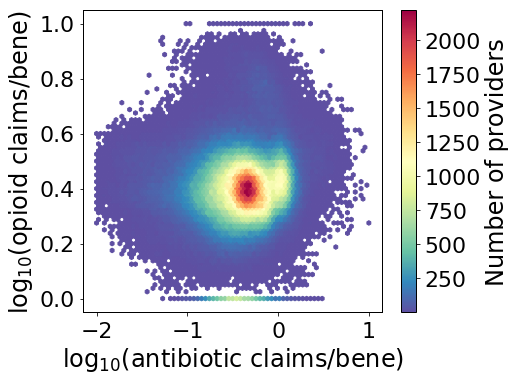

In [62]:
plt.clf()
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[-2,1,0,1]
image=plt.hexbin(np.log10(dr_antibiotic),f_male,extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(antibiotic claims/bene)")
plt.ylabel(r'$\rm log_{10}$'+"(opioid claims/bene)")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
#plt.savefig("provider_correlation.png")
plt.show()

/Users/yli/source/yt-conda/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


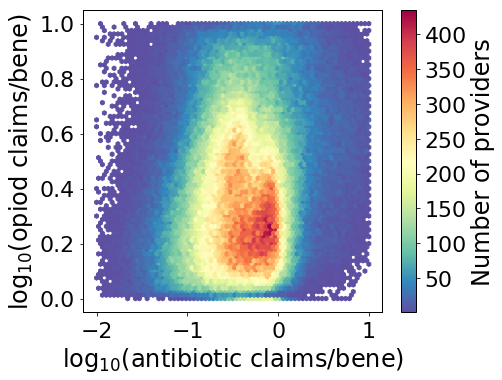

In [63]:
plt.clf()
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[-2,1,0,1]
image=plt.hexbin(np.log10(dr_opioid),lis_fraction,extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(antibiotic claims/bene)")
plt.ylabel(r'$\rm log_{10}$'+"(opioid claims/bene)")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
#plt.savefig("provider_correlation.png")
plt.show()



0.27241403371344075 0.0


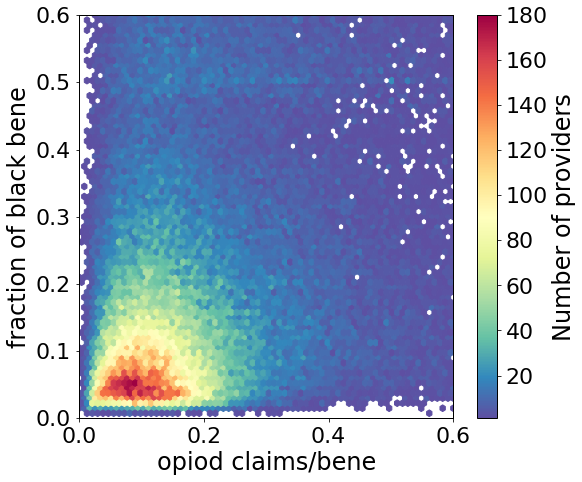

In [300]:
good=(dr_opioid_bene>0)&(f_black>0)
rr, pp = stats.spearmanr(dr_opioid_bene[good], f_black[good])
print(rr,pp)
plt.clf()
plt.figure(figsize=(10, 8))
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,0.6,0,0.6]
image=plt.hexbin(dr_opioid_bene[good],f_black[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel("opioid claims/bene")
plt.ylabel("fraction of black bene")
plt.xlim(0,0.6)
plt.ylim(0,0.6)
cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
plt.savefig("opioid_black.png")
plt.show()
#print(dr_opioid_bene[good].shape)

0.19965648414618614 0.0


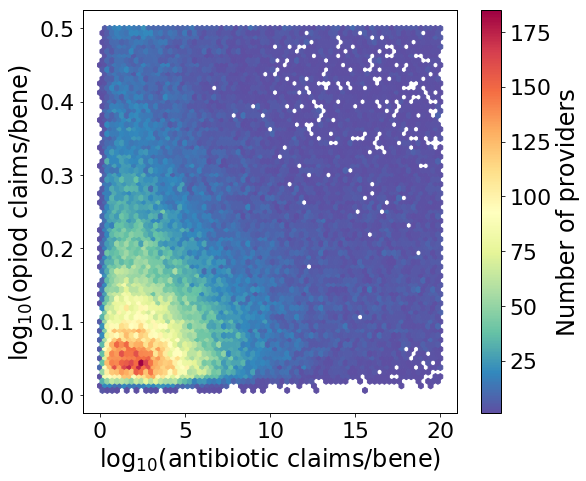

In [299]:
plt.clf()
plt.figure(figsize=(10, 8))
good=(opioid_prescriber_rate>0)&(f_black>0)
rr, pp = stats.spearmanr(opioid_prescriber_rate[good], f_black[good])
print(rr,pp)
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,20,0,0.5]
image=plt.hexbin(opioid_prescriber_rate[good],f_black[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(antibiotic claims/bene)")
plt.ylabel(r'$\rm log_{10}$'+"(opioid claims/bene)")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
#plt.savefig("provider_correlation.png")
plt.show()





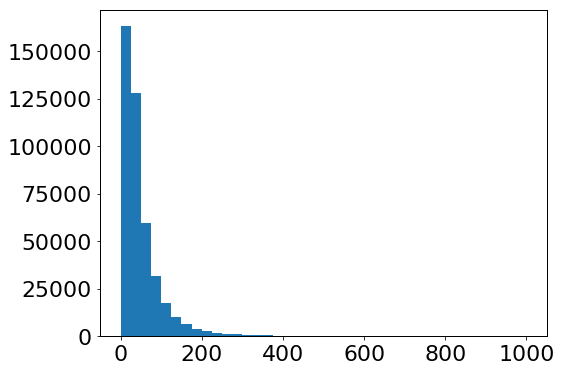

In [65]:
ok=opioid_bene_count>10
plt.hist(opioid_bene_count[ok],bins=40,range=(0,1000))
#plt.hist(np.log10(bene_count[ok]),bins=40,range=(1,3))
plt.show()

/Users/yli/source/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


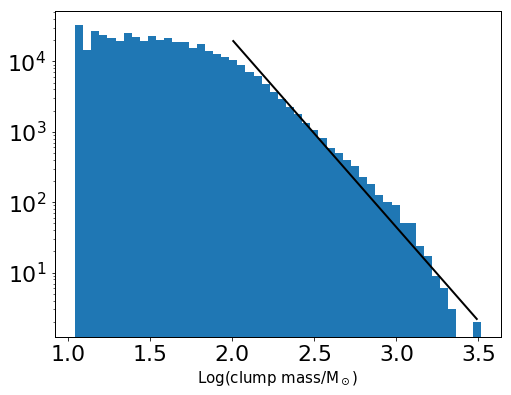

-2.6598213912066924 9.624569447300084


In [66]:
fig = plt.figure(figsize = (8,6))
hist, bin_edges = np.histogram(np.log10(opioid_bene_count[ok]), bins = 50)
plt.hist(np.log10(opioid_bene_count[ok]), bins = 50)
xx=bin_edges[:-1]+(bin_edges[1]-bin_edges[0])/2
x_ok=(xx>2)&(xx<4.5)
yy_fit=np.log10(hist[x_ok])
yy_fit[yy_fit<0]=1e-5
aa,bb=np.polyfit(xx[x_ok], yy_fit, 1)
y_expect=10**(xx[x_ok]*aa+bb)
#plt.plot(xx,hist,color="C2")
plt.plot(xx[x_ok],y_expect,color="k")
#plt.title('Marie-Lou Perseus Data 2D', fontsize = 20)
plt.xlabel('Log(clump mass/'+r'$\rm M_\odot)$', fontsize = 15)
plt.yscale('log')
#plt.xscale('log')
#plt.rc('xtick', labelsize= 15)
#plt.rc('ytick', labelsize= 15)
#plt.xlim(0,)
#plt.gca().set_ylim(top=1e4)
#plt.savefig("Persesu_ML2D_ClumpMassDistribution2.png")
plt.show()
print(aa,bb)

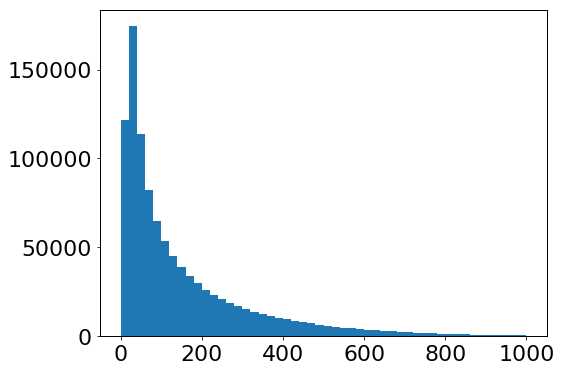

In [215]:
ok=(bene_count>0)
plt.hist(bene_count[ok],bins=50,range=(0,1000))
plt.show()

In [67]:
census2=pd.read_table("~/Desktop/poverty_census.txt")
census2.keys()

Index(['NAME', 'below_poverty'], dtype='object')

In [68]:
NAME=census2["NAME"]

In [69]:
f_poverty=census2['below_poverty']

In [70]:
zip_list=[]
for name in NAME[:]:
    zip_list.append(name[6:11])


In [71]:
nppes_provider_zip5=data["nppes_provider_zip5"]

In [72]:
zip_code=np.array(zip_list).astype(np.float)
zip_code.shape

(33120,)

In [73]:
dr_poverty=np.zeros_like(nppes_provider_zip5)
good=(f_poverty!="-")
f_good=np.array(f_poverty[good])
zip_good=np.array(zip_code[good])
#f_poverty_array=np.array(f_poverty).astype(np.float)
#for (poor,zip) in zip(f_poverty[good],zip_code[good]):
i=0
zip_opioid=np.zeros_like(zip_good)
for zip in zip_good:
    mask=np.isin(nppes_provider_zip5,zip)
    dr_poverty[mask]=f_good[i]
    zip_opioid[i]=np.mean(dr_opioid[mask])
    i+=1

/Users/yli/source/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


0.06154138397857641 0.0


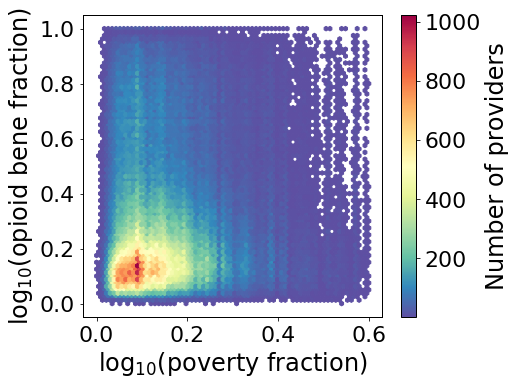

In [74]:
plt.clf()
good=(dr_opioid_bene>0)&(bene_count>0)&(dr_poverty>0)
rr, pp = stats.spearmanr(dr_opioid_bene[good], dr_poverty[good])
print(rr,pp)
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,0.6,0,1]
image=plt.hexbin(dr_poverty[good]/100,dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=plt.hexbin(dr_antipsych_bene[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)\
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(poverty fraction)")
plt.ylabel(r'$\rm log_{10}$'+"(opioid bene fraction)")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
#plt.savefig("provider_correlation_bene.png")  #
plt.show()

In [272]:
poverty_array=f_good.astype(np.float)
good=(zip_opioid>0)&(poverty_array>0)
rr, pp = stats.spearmanr(zip_opioid[good], poverty_array[good])
#rr, pp = stats.pearsonr(zip_opioid[good], poverty_array[good])
print(rr,pp)

0.1305579291841691 5.589182950492327e-64


/Users/yli/source/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


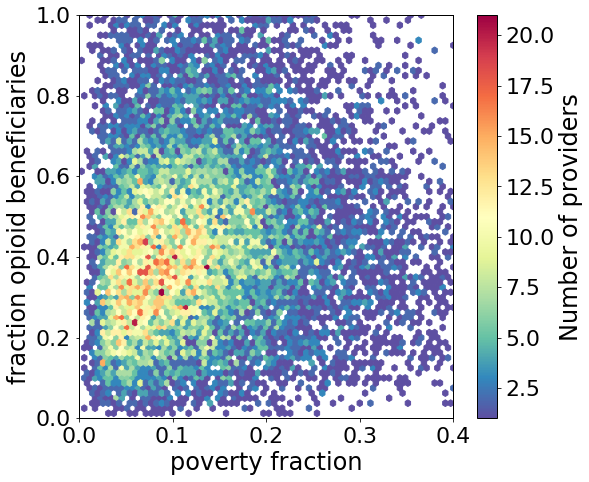

In [274]:
plt.clf()
fig = plt.figure(figsize=(10, 8))
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,0.4,0,1]
image=plt.hexbin(poverty_array[good]/100,zip_opioid[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=plt.hexbin(dr_antipsych_bene[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)\
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel("poverty fraction")
plt.ylabel("fraction opioid beneficiaries")
plt.xlim(0,0.4)
plt.ylim(0,1)
cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
plt.savefig("poverty_opioid.png")  #
plt.show()

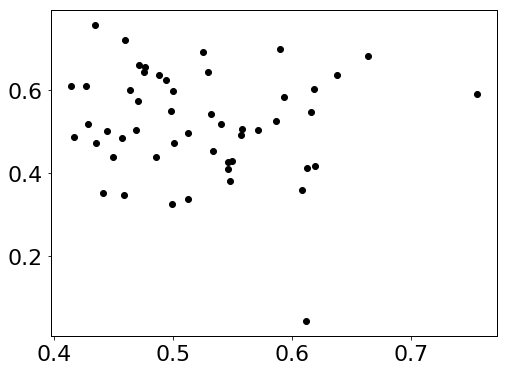

-0.08199095022624435 0.567334917055383


In [174]:
plt.clf()
plt.plot(antibiotic_per_beneficiary,redness,linestyle="None",marker="o",color="k")
plt.show()
rr, pp = stats.spearmanr(antibiotic_per_beneficiary, redness)
print(rr,pp)

In [170]:
opioid_per_beneficiary.shape
redness

array([0.64374144, 0.58385655, 0.51890023, 0.64285138, 0.33871779,
       0.47316667, 0.42858452, 0.44001379, 0.04304812, 0.50618835,
       0.52661173, 0.32558663, 0.68310177, 0.40979949, 0.6011731 ,
       0.55063548, 0.6111147 , 0.65670629, 0.60171677, 0.48403209,
       0.3598375 , 0.35348721, 0.50117668, 0.49168143, 0.59089847,
       0.59818561, 0.61109664, 0.63547674, 0.48706291, 0.49802972,
       0.4271581 , 0.45349205, 0.38227559, 0.51903746, 0.69809243,
       0.54267685, 0.69304737, 0.43844161, 0.50375536, 0.41689296,
       0.57460256, 0.65971858, 0.63624343, 0.54713226, 0.62383658,
       0.34813574, 0.47173624, 0.41213069, 0.72161052, 0.50407989,
       0.7570532 ])

In [ ]:
ok=dr_poverty>0
plt.hist(dr_poverty[ok],bins=50)
plt.show()

/Users/yli/source/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


nan nan


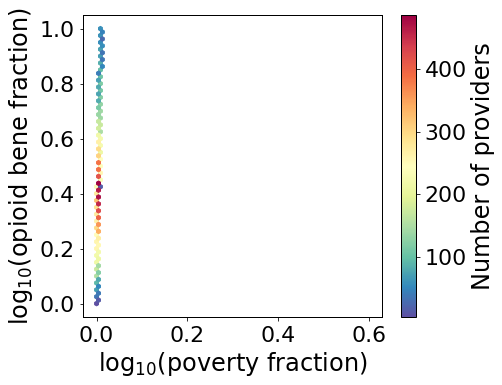

In [76]:
plt.clf()
good=(zip_opioid>0)
rr, pp = stats.spearmanr(zip_opioid[good], f_good[good])
print(rr,pp)
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[0,0.6,0,1]
image=plt.hexbin(zip_opioid[good]/100,zip_opioid[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=plt.hexbin(dr_antipsych_bene[good],dr_opioid_bene[good],extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)\
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(poverty fraction)")
plt.ylabel(r'$\rm log_{10}$'+"(opioid bene fraction)")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
#plt.savefig("provider_correlation_bene.png")  #
plt.show()